## Question 1
Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. 

But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. 
NCR include Gurgaon, Noida and New Delhi. 

Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. 

Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given *locations*.

In [176]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [177]:
df = pd.read_csv('startup_funding.csv',encoding='utf-8')

In [178]:
df.CityLocation.replace('bangalore','Bangalore',inplace=True)
df.CityLocation.replace('Delhi','New Delhi',inplace=True)

In [179]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [180]:
df.dropna(subset=['CityLocation'],inplace=True)

In [181]:
def removeCity(s):
    return s.split('/')[0].strip()
df.CityLocation = df.CityLocation.apply(removeCity)

In [182]:
pref_loc = ['Bangalore', 'Mumbai']

In [183]:
c_values = df.CityLocation.value_counts()[pref_loc]

In [184]:
type(c_values)

pandas.core.series.Series

In [185]:
c_values

Bangalore    635
Mumbai       449
Name: CityLocation, dtype: int64

In [186]:
NCR = ['Gurgaon', 'Noida', 'New Delhi']
n_values = df.CityLocation.value_counts()[NCR]
n_values = pd.Series(n_values.sum(),index=['NCR'])
#_value = pd.Series(n_values.sum(),index=[NCR])
c_values = c_values.append(n_values)
c_keys = c_values.keys()

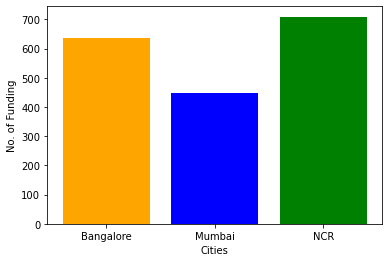

In [109]:
plt.bar(c_keys,c_values,color=['orange','blue','green'])
plt.xlabel('Cities')
plt.ylabel('No. of Funding')
plt.show()

## Answer 1:

I would suggest my friend to choose NCR area since it has most number of fundings to Startups

## Question 2 

Even after trying for so many times, your friend’s startup could not find the investment.
So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. 

Your list will increase the chance of your friend startup getting some initial investment by contacting these investors.

Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

In [170]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [171]:
df = pd.read_csv('startup_funding.csv',encoding='utf-8')

In [172]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [173]:
#df.InvestorsName.replace(' , ',',',inplace=True)
df = df.InvestorsName.str.split(',',expand=True)
df.fillna(False,inplace=True)

In [174]:
investor = {}
for i in df.columns:
    for j in df[i].index:
        name = df[i][j]
        if name: 
            name = name.strip()
            investor[name] = investor.get(name, 0) + 1
inv = pd.Series(investor)

In [175]:
inv = inv.sort_values(ascending=False)
for i in range(5):
    print(inv.index[i])


Sequoia Capital
Accel Partners
Kalaari Capital
SAIF Partners
Indian Angel Network


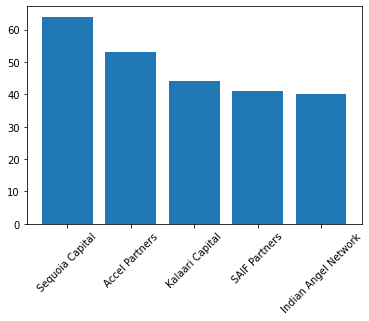

In [77]:
plt.bar(inv.index[:5],inv[:5])
plt.xticks(rotation=45) 
plt.show()

## Question 3

After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. 

So before finalising the previous list, you want to improvise it by finding the **top 5 investors who have invested in different number of startups.***

This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company.

There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [187]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [188]:
df = pd.read_csv('startup_funding.csv',encoding='utf-8')

In [189]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [190]:
df.StartupName = df.StartupName.replace('Flipkart.com','Flipkart')
df.StartupName = df.StartupName.replace('Ola Cabs','Ola')
df.StartupName = df.StartupName.replace('Olacabs','Ola')
df.StartupName = df.StartupName.replace('Oyorooms','Oyo')
df.StartupName = df.StartupName.replace('OyoRooms','Oyo')
df.StartupName = df.StartupName.replace('Oyo Rooms','Oyo')
df.StartupName = df.StartupName.replace('OYO Rooms','Oyo')
df.StartupName = df.StartupName.replace('Paytm Marketplace','Paytm')

In [191]:
data = df.InvestorsName.str.split(',',expand=True)
data.fillna(False,inplace=True)
df.fillna(False,inplace=True)
df.dropna(subset=['InvestorsName'],inplace=True)

In [164]:
investor = {}
for i in data.columns:
    for j in data[i].index:
        name = data[i][j]
        if name: 
            name = name.strip()
            #investor.add(name)
            investor[name] = investor.get(name, 0) + 1
investor = pd.Series(investor)

In [165]:
un_investor = {}
for i in range(len(df.StartupName)):
    if(df.loc[i].InvestorsName != False):
        Investors = df.loc[i].InvestorsName.split(',')
        for j in Investors:
            j = j.strip()
            if(j in un_investor):
                    un_investor[j].add(df.loc[i].StartupName)
            else:
                un_investor[j] = {df.loc[i].StartupName} 

In [166]:
uni_investor_val = []
uni_investor = []
for i in un_investor:
    uni_investor_val.append(len(un_investor[i]))
    uni_investor.append(i)
uni_investors = pd.Series(uni_investor_val,index=uni_investor)

In [167]:
uni_investors = uni_investors.sort_values(ascending=False)
del uni_investors['']

In [192]:
for i in range(5):
    print(uni_investors.index[i])


Sequoia Capital
Accel Partners
Kalaari Capital
Indian Angel Network
Blume Ventures


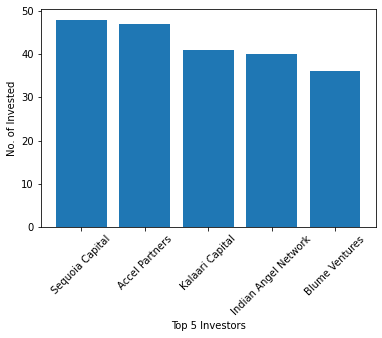

In [193]:
plt.bar(uni_investors.index[:5],uni_investors[:5])
plt.xticks(rotation=45) 
plt.ylabel('No. of Invested')
plt.xlabel('Top 5 Investors')
plt.show()

## Answer 3



I would suggest my friend to ask these Investors to invest in his Startup
since these are investing in multiple ventures.

Sequoia Capital

Accel Partners

Kalaari Capital

Indian Angel Network

Blume Ventures

# -------------------------------------------------------------

## Question 4

Even after putting so much effort in finding the probable investors, 

it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. 

This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - 
### Seed Funding and Crowdfunding. 
Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. 

Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [194]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [195]:
df = pd.read_csv('startup_funding.csv',encoding='utf-8')

In [196]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [197]:
df.StartupName = df.StartupName.replace('Flipkart.com','Flipkart')
df.StartupName = df.StartupName.replace('Ola Cabs','Ola')
df.StartupName = df.StartupName.replace('Olacabs','Ola')
df.StartupName = df.StartupName.replace('Oyorooms','Oyo')
df.StartupName = df.StartupName.replace('OyoRooms','Oyo')
df.StartupName = df.StartupName.replace('Oyo Rooms','Oyo')
df.StartupName = df.StartupName.replace('OYO Rooms','Oyo')
df.StartupName = df.StartupName.replace('Paytm Marketplace','Paytm')
df['InvestmentType'] = df['InvestmentType'].str.replace('SeedFunding','Seed Funding')
df['InvestmentType'] = df['InvestmentType'].str.replace('PrivateEquity','Private Equity')
df['InvestmentType'] = df['InvestmentType'].str.replace('Crowd funding','Crowd Funding')

In [198]:
data = df.InvestorsName.str.split(',',expand=True)
data.fillna(False,inplace=True)
df.fillna(False,inplace=True)
df.dropna(subset=['InvestorsName'],inplace=True)

In [199]:
investor = {}
for i in data.columns:
    for j in data[i].index:
        name = data[i][j]
        if name: 
            name = name.strip()
            #investor.add(name)
            investor[name] = investor.get(name, 0) + 1
investor = pd.Series(investor)

In [200]:
un_investor = {}
for i in range(len(df.StartupName)):
    if(df.loc[i].InvestorsName != False):
        if(df.loc[i].InvestmentType == 'Seed Funding' or df.loc[i].InvestmentType == 'Crowd Funding'):
            Investors = df.loc[i].InvestorsName.split(',')
            for j in Investors:
                j = j.strip()
                if(j in un_investor):
                    un_investor[j].add(df.loc[i].StartupName)
                else:
                    un_investor[j] = {df.loc[i].StartupName} 

In [201]:
uni_investor_val = []
uni_investor = []
for i in un_investor:
    uni_investor_val.append(len(un_investor[i]))
    uni_investor.append(i)
uni_investors = pd.Series(uni_investor_val,index=uni_investor)

In [202]:
uni_investors = uni_investors.sort_values(ascending=False)
del uni_investors['']
del uni_investors['Undisclosed Investors']
del uni_investors['Undisclosed investors']

In [203]:
for i in range(5):
    print(uni_investors.index[i])

Indian Angel Network
Rajan Anandan
LetsVenture
Anupam Mittal
Kunal Shah


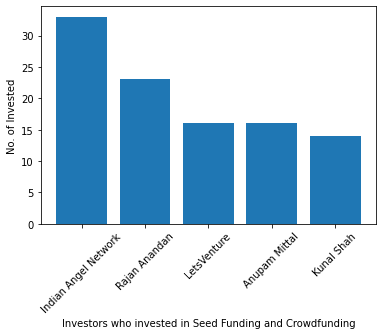

In [158]:
plt.bar(uni_investors.index[:5],uni_investors[:5])
plt.xticks(rotation=45) 
plt.ylabel('No. of Invested')
plt.xlabel('Investors who invested in Seed Funding and Crowdfunding')
plt.show()

## Answer 4



I would suggest my friend to ask these Investors to invest in his Startup
since these are investing in multiple ventures with Seed Funding and Crowdfunding.

Indian Angel Network

Rajan Anandan

LetsVenture

Anupam Mittal

Kunal Shah

# -------------------------------------------------------------

## Question 5

Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode.

Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors

Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is **Private Equity.**

Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity.

Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [204]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as p

In [205]:
df = pd.read_csv('startup_funding.csv',encoding='utf-8')

In [206]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [207]:
df.StartupName = df.StartupName.replace('Flipkart.com','Flipkart')
df.StartupName = df.StartupName.replace('Ola Cabs','Ola')
df.StartupName = df.StartupName.replace('Olacabs','Ola')
df.StartupName = df.StartupName.replace('Oyorooms','Oyo')
df.StartupName = df.StartupName.replace('OyoRooms','Oyo')
df.StartupName = df.StartupName.replace('Oyo Rooms','Oyo')
df.StartupName = df.StartupName.replace('OYO Rooms','Oyo')
df.StartupName = df.StartupName.replace('Paytm Marketplace','Paytm')
df['InvestmentType'] = df['InvestmentType'].str.replace('SeedFunding','Seed Funding')
df['InvestmentType'] = df['InvestmentType'].str.replace('PrivateEquity','Private Equity')
df['InvestmentType'] = df['InvestmentType'].str.replace('Crowd funding','Crowd Funding')

In [208]:
data = df.InvestorsName.str.split(',',expand=True)
data.fillna(False,inplace=True)
df.fillna(False,inplace=True)
df.dropna(subset=['InvestorsName'],inplace=True)

In [209]:
investor = {}
for i in data.columns:
    for j in data[i].index:
        name = data[i][j]
        if name: 
            name = name.strip()
            #investor.add(name)
            investor[name] = investor.get(name, 0) + 1
investor = pd.Series(investor)

In [210]:
un_investor = {}
for i in range(len(df.StartupName)):
    if(df.loc[i].InvestorsName != False):
        if(df.loc[i].InvestmentType == 'Private Equity'):
            Investors = df.loc[i].InvestorsName.split(',')
            for j in Investors:
                j = j.strip()
                if(j in un_investor):
                    un_investor[j].add(df.loc[i].StartupName)
                else:
                    un_investor[j] = {df.loc[i].StartupName} 

In [211]:
uni_investor_val = []
uni_investor = []
for i in un_investor:
    uni_investor_val.append(len(un_investor[i]))
    uni_investor.append(i)
uni_investors = pd.Series(uni_investor_val,index=uni_investor)

In [212]:
uni_investors = uni_investors.sort_values(ascending=False)
del uni_investors['']
del uni_investors['Undisclosed Investors']
del uni_investors['Undisclosed investors']

In [213]:
for i in range(5):
    print(uni_investors.index[i])

Sequoia Capital
Accel Partners
Kalaari Capital
Blume Ventures
SAIF Partners


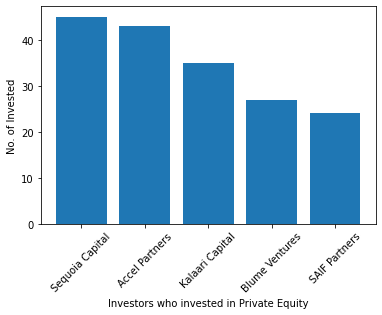

In [145]:
plt.bar(uni_investors.index[:5],uni_investors[:5])
plt.ylabel('No. of Invested')
plt.xlabel('Investors who invested in Private Equity')
plt.xticks(rotation=45) 
plt.show()